<h1 align="center"> ELO Ranking for professional Dota team</h1>

<h2 align="center"> Frankfurt Major Invitation 2015</h2>

In [1]:
# Some import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')

<h2> Elo funtion and class</h2>

In [2]:
# Elo formula 
# R=R+KG(W-We)
# R = Elo rank
# K = Weight of competition
# G = coefficient according to the result

def compute_elo(Team1, Team2 ,score1, score2 ,Tournament):
    elo1 = Team1.elo 
    elo2 = Team2.elo 
    k = Tournament.weight
    We1 = 1/(1+10**(-(elo1-elo2)/400))
    We2 = 1/(1+10**(-(elo2-elo1)/400))
    
    if(score1==score2):
        elo1 = elo1 + k * 1 *(0.5-We1)
        elo2 = elo2 + k * 1 *(0.5-We2)
    elif(score1>score2+1):
        elo1 = elo1 + k * 1.5 *(1-We1)
        elo2 = elo2 - k * 1.5 *(We2)
    elif(score1>score2):
        elo1 = elo1 + k * 1 *(1-We1)
        elo2 = elo2 - k * 1 *(We2)
    elif(score2>score1+1):
        elo1 = elo1 - k * 1.5 *(We1)
        elo2 = elo2 + k * 1.5 *(1-We2)
    elif(score2>score1):
        elo1 = elo1 - k * 1 *(We1)
        elo2 = elo2 + k * 1 *(1-We2)
    
    Team1.elo = round(elo1)
    Team2.elo = round(elo2)

def display_rank(List_team):
    l =[]
    for team in List_team:
        l.append([team.name,team.elo,team.major,team.tournament])
    df =pd.DataFrame(data=l, columns=["team","Rank", "Major", "Tournament"])
    return df.sort_values(by="Rank", ascending=0).reset_index(drop=True)

In [3]:
class Team:
    def __init__(self,name, elo=1000, major=0, tournament=0,invited=False,place="17"):
        self.elo = elo
        self.name = name
        self.major = major
        self.tournament = tournament
        self.invited=invited
        self.place=place
        
    
class Tournament:
        def __init__(self,name, weight):
            self.weight = weight
            self.name = name

### Weight of tournament
* The International: 60
* Major: 50
* Cash price >200k: 30
* Cash price >100k & <200k: 20
* Cash price <100K: 10

In [4]:
# test
Alliance = Team("Alliance", 1000)
Newbee = Team("Newbee", 1400)
TI6 = Tournament("The International 6", 60)
print(Alliance.elo)
print(Newbee.elo)
compute_elo(Alliance, Newbee, 2, 0, TI6)
print("\n")
print(Alliance.elo)
print(Newbee.elo)

1000
1400


1082
1318


<h2> The International 5</h2>

In [5]:
# List of teams

TI5 = Tournament("The International 5", 60)


Vici_Gaming = Team("Vici Gaming", 1000,invited=True, place='4')
Evil_Geniuses  = Team("Evil Geniuses", 1000,invited=True, place="1")
Team_Secret  = Team("Team Secret", 1000,invited=True,place="7-8")
Invictus_Gaming  = Team("Invictus Gaming", 1000,place="9-12")
LGD_Gaming  = Team("LGD Gaming", 1000,invited=True,place="3")
Cloud_9  = Team("Cloud 9", 1000,place="9-12")
Team_Empire = Team("Team Empire", 1000,place="9-12")
Virtus_pro  = Team("Virtus Pro", 1000,invited=True,place="5-6")
Newbee  = Team("Newbee", 1000,place="13-16")
Fnatic  = Team("Fnatic", 1000,place="13-16")
Natus_Vincere  = Team("Na'Vi", 1000,place="13-16")
Complexity  = Team("Complexity Gaming", 1000,place="9-12")
CDEC_Gaming = Team("CDEC Gaming", 1000,invited=True,place="2")
Ehome  = Team("EHOME", 1000,invited=True,place="5-6")
MVP_Hot6  = Team("MVPHot6", 1000,place="13-16")
MVP_Phoenix =  Team("MVP Phoenix", 1000,place="7-8")

List_team = [Vici_Gaming,Evil_Geniuses,Team_Secret,Invictus_Gaming,LGD_Gaming,Cloud_9,Team_Empire,Virtus_pro,Newbee,Fnatic,
       Natus_Vincere,Complexity,CDEC_Gaming,Ehome,MVP_Hot6,MVP_Phoenix]

display_rank(List_team)

,team,Rank,Major,Tournament
0,Vici Gaming,1000,0,0
1,Evil Geniuses,1000,0,0
2,Team Secret,1000,0,0
3,Invictus Gaming,1000,0,0
4,LGD Gaming,1000,0,0
5,Cloud 9,1000,0,0
6,Team Empire,1000,0,0
7,Virtus Pro,1000,0,0
8,Newbee,1000,0,0
9,Fnatic,1000,0,0


In [6]:
# Game group stage
# groupA
compute_elo(Complexity,Cloud_9,2,0,TI5)
compute_elo(Cloud_9,Invictus_Gaming,2,0,TI5)
compute_elo(Cloud_9,Fnatic,2,0,TI5)
compute_elo(LGD_Gaming,Cloud_9,2,0,TI5)
compute_elo(Cloud_9,MVP_Phoenix,2,0,TI5)
compute_elo(Natus_Vincere,Cloud_9,1,1,TI5)
compute_elo(Team_Secret,Cloud_9,2,0,TI5)
compute_elo(Complexity,Fnatic,2,0,TI5)
compute_elo(Complexity,Invictus_Gaming,1,1,TI5)
compute_elo(LGD_Gaming,Complexity,2,0,TI5)
compute_elo(Complexity,MVP_Phoenix,2,0,TI5)
compute_elo(Complexity,Fnatic,1,1,TI5)
compute_elo(Complexity,Team_Secret,1,1,TI5)
compute_elo(Fnatic,Invictus_Gaming,1,1,TI5)
compute_elo(Fnatic,LGD_Gaming,0,2,TI5)
compute_elo(Fnatic,MVP_Phoenix,1,1,TI5)
compute_elo(Fnatic,Team_Secret,1,1,TI5)
compute_elo(Fnatic,Natus_Vincere,1,1,TI5)
compute_elo(Invictus_Gaming,LGD_Gaming,1,1,TI5)
compute_elo(Invictus_Gaming,MVP_Phoenix,0,2,TI5)
compute_elo(Team_Secret,Invictus_Gaming,2,0,TI5)
compute_elo(Invictus_Gaming,Natus_Vincere,2,0,TI5)
compute_elo(LGD_Gaming,MVP_Phoenix,2,0,TI5)
compute_elo(LGD_Gaming,Natus_Vincere,2,0,TI5)
compute_elo(LGD_Gaming,Team_Secret,1,1,TI5)
compute_elo(MVP_Phoenix,Natus_Vincere,1,1,TI5)
compute_elo(MVP_Phoenix,Team_Secret,1,1,TI5)
compute_elo(Team_Secret,Natus_Vincere,2,0,TI5)

# groupB
compute_elo(CDEC_Gaming,Ehome,1,1,TI5)
compute_elo(Evil_Geniuses,CDEC_Gaming,2,0,TI5)
compute_elo(CDEC_Gaming,MVP_Hot6,2,0,TI5)
compute_elo(CDEC_Gaming,Newbee,2,0,TI5)
compute_elo(CDEC_Gaming,Team_Empire,2,0,TI5)
compute_elo(CDEC_Gaming,Vici_Gaming,2,0,TI5)
compute_elo(Virtus_pro,CDEC_Gaming,2,0,TI5)
compute_elo(Ehome,Evil_Geniuses,1,1,TI5)
compute_elo(Ehome,MVP_Hot6,2,0,TI5)
compute_elo(Ehome,Newbee,1,1,TI5)
compute_elo(Ehome,Team_Empire,1,1,TI5)
compute_elo(Ehome,Vici_Gaming,1,1,TI5)
compute_elo(Ehome,Virtus_pro,2,0,TI5)
compute_elo(Evil_Geniuses,MVP_Hot6,2,0,TI5)
compute_elo(Evil_Geniuses,Newbee,1,1,TI5)
compute_elo(Evil_Geniuses,Team_Empire,1,1,TI5)
compute_elo(Evil_Geniuses,Vici_Gaming,2,0,TI5)
compute_elo(Evil_Geniuses,Virtus_pro,1,1,TI5)
compute_elo(MVP_Hot6,Newbee,1,1,TI5)
compute_elo(MVP_Hot6,Team_Empire,0,2,TI5)
compute_elo(MVP_Hot6,Vici_Gaming,2,0,TI5)
compute_elo(MVP_Hot6,Virtus_pro,0,2,TI5)
compute_elo(Newbee,Team_Empire,1,1,TI5)
compute_elo(Newbee,Vici_Gaming,1,1,TI5)
compute_elo(Newbee,Virtus_pro,1,1,TI5)
compute_elo(Team_Empire,Vici_Gaming,2,0,TI5)
compute_elo(Team_Empire,Virtus_pro,2,0,TI5)
compute_elo(Vici_Gaming,Virtus_pro,1,1,TI5)

# WB
compute_elo(LGD_Gaming,Team_Empire,2,1,TI5)
compute_elo(CDEC_Gaming,Cloud_9,2,0,TI5)
compute_elo(Evil_Geniuses,Complexity,2,0,TI5)
compute_elo(Ehome,Team_Secret,2,0,TI5)
compute_elo(CDEC_Gaming,LGD_Gaming,2,0,TI5)
compute_elo(Evil_Geniuses,Ehome,2,1,TI5)
compute_elo(CDEC_Gaming,Evil_Geniuses,2,0,TI5)

# LB
compute_elo(MVP_Phoenix,Newbee,1,0,TI5)
compute_elo(Vici_Gaming,Natus_Vincere,1,0,TI5)
compute_elo(Virtus_pro,Fnatic,1,0,TI5)
compute_elo(Invictus_Gaming,MVP_Hot6,1,0,TI5)
compute_elo(MVP_Phoenix,Team_Empire,2,0,TI5)
compute_elo(Vici_Gaming,Cloud_9,2,0,TI5)
compute_elo(Virtus_pro,Complexity,2,1,TI5)
compute_elo(Team_Secret,Invictus_Gaming,2,1,TI5)
compute_elo(Vici_Gaming,MVP_Phoenix,2,0,TI5)
compute_elo(Virtus_pro,Team_Secret,2,1,TI5)
compute_elo(Vici_Gaming,Ehome,2,0,TI5)
compute_elo(LGD_Gaming,Virtus_pro,2,0,TI5)
compute_elo(LGD_Gaming,Vici_Gaming,2,1,TI5)
compute_elo(Evil_Geniuses,LGD_Gaming,2,0,TI5)

# Grand Final
compute_elo(Evil_Geniuses,CDEC_Gaming,3,1,TI5)

Evil_Geniuses.major=1
Evil_Geniuses.elo+=TI5.weight



display_rank(List_team)

,team,Rank,Major,Tournament
0,Evil Geniuses,1272,1,0
1,CDEC Gaming,1149,0,0
2,LGD Gaming,1127,0,0
3,Vici Gaming,1042,0,0
4,Team Secret,1037,0,0
5,EHOME,1036,0,0
6,Virtus Pro,1034,0,0
7,Team Empire,1002,0,0
8,MVP Phoenix,981,0,0
9,Complexity Gaming,976,0,0


The Ranking is quiet different from the results of TI
Teams coming from the winner bracket are higher than team in looser bracket except Cloud 9

<h2>ESL One New York 2015</h2>

In [7]:
# Introducing new teams
Vega_Squadron = Team("Vega Squadron", 1000,invited=True)
Team_Archon = Team("Team Archon", 1000)
List_team.append(Vega_Squadron)
List_team.append(Team_Archon)

# Create Tournament
ESL_ONE_NY_2015 = Tournament("ESL One NY 2015",30)

In [8]:
# Tournament
compute_elo(Team_Secret,Fnatic,2,1,ESL_ONE_NY_2015)
compute_elo(CDEC_Gaming,Team_Archon,2,0,ESL_ONE_NY_2015)
compute_elo(Invictus_Gaming,Virtus_pro,2,1,ESL_ONE_NY_2015)
compute_elo(Vega_Squadron,Evil_Geniuses,2,0,ESL_ONE_NY_2015)
compute_elo(Team_Secret,CDEC_Gaming,2,0,ESL_ONE_NY_2015)
compute_elo(Vega_Squadron,Invictus_Gaming,2,1,ESL_ONE_NY_2015)
compute_elo(Vega_Squadron,Team_Secret,2,1,ESL_ONE_NY_2015)

Vega_Squadron.tournament=1
Vega_Squadron.elo+=ESL_ONE_NY_2015.weight

In [9]:
display_rank(List_team)

,team,Rank,Major,Tournament
0,Evil Geniuses,1235,1,0
1,CDEC Gaming,1132,0,0
2,LGD Gaming,1127,0,0
3,Vega Squadron,1095,0,1
4,Team Secret,1061,0,0
5,Vici Gaming,1042,0,0
6,EHOME,1036,0,0
7,Virtus Pro,1015,0,0
8,Team Empire,1002,0,0
9,Team Archon,987,0,0


In [10]:
l=[]
for team in List_team:
    l.append([team.name,team.elo,team.major,team.tournament,team.invited,team.place])
df =pd.DataFrame(data=l, columns=["team","Rank", "Major", "Tournament", "Invited", "place"])

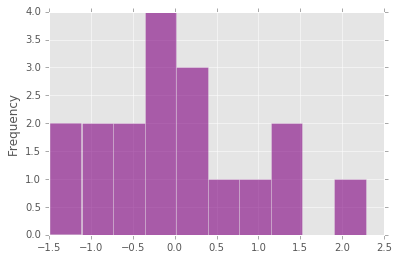

In [11]:
mean=df.Rank.mean()
std = df.Rank.std()
df["norm_elo"]=np.around((df.Rank-mean)/std, decimals=2)
df.norm_elo.plot.hist(alpha=0.6, color='purple')

In [12]:
df.to_csv("data/fall_2015.csv")

In [14]:
df.sort_values(by="Rank", ascending=0).reset_index(drop=True)

,team,Rank,Major,Tournament,Invited,place,norm_elo
0,Evil Geniuses,1235,1,0,True,1,2.28
1,CDEC Gaming,1132,0,0,True,2,1.26
2,LGD Gaming,1127,0,0,True,3,1.21
3,Vega Squadron,1095,0,1,True,17,0.89
4,Team Secret,1061,0,0,True,7-8,0.55
5,Vici Gaming,1042,0,0,True,4,0.37
6,EHOME,1036,0,0,True,5-6,0.31
7,Virtus Pro,1015,0,0,True,5-6,0.10
8,Team Empire,1002,0,0,False,9-12,-0.03
9,Team Archon,987,0,0,False,17,-0.18



<p>The teams invited by Valve were :</p>
* Evil Geniuses
* Team Secret
* CDEC Gaming
* LGD Gaming
* Vici Gaming
* Vega Squadron
* Ehome
* Virtus Pro

Teams with highest score are: 
* Evil Geniuses
* Team Secret
* CDEC Gaming
* LGD Gaming
* Vici Gaming
* Vega Squadron
* Ehome
* Virtus Pro


